In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score 
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


This dataset is an NHIS dataset showing the lifestyle factors and social determinants of health that impact the risk of pre-diabetes of ~27000 individuals. 

In [3]:
df_NHIS_all_year = pd.read_csv('df_NHIS_data_filt2d_all_year_binned.csv')
df_NHIS_all_year = df_NHIS_all_year.drop(columns = 'Unnamed: 0')
df_NHIS_all_year.head()

,SEX_A,AGEP_A,EDUC_A,RACEALLP_A,PCNTFAM_A,OVER65FLG_A,PHSTAT_A,HYPEV_A,CHLEV_A,HISDETP_A,...,ADA_FULL_SCORE1,ADA_FULL_SCORE2,BIN_ADA_FULL_SCORE1,BIN_ADA_FULL_SCORE2,ADA_PART_SCORE1,ADA_PART_SCORE2,BIN_ADA_PART_SCORE1,BIN_ADA_PART_SCORE2,comord_severe,comord_mild
0,1,85,5,1,2,1,2,2,2,3,...,5,5,1,1,5,5,1,1,1,1
1,1,39,5,1,3,0,2,1,2,3,...,5,5,1,1,5,5,1,1,0,1
2,1,42,4,2,1,0,3,2,1,3,...,2,2,0,0,2,2,0,0,0,1
3,1,32,8,1,2,0,1,2,2,1,...,1,1,0,0,1,1,0,0,0,0
4,2,85,4,1,1,1,3,1,2,3,...,6,6,1,1,6,6,1,1,2,2


In [6]:
var_list = ['AGEP_A','BIN_SEX_A',
 'BIN_HYPEV_A',
 'BIN_CHLEV_A',
 'BIN_CHDEV_A',
 'BIN_STREV_A',
 'BIN_ASEV_A',
 'BIN_CANEV_A',
 'BIN_GESDIB_A',
 'BIN_DIBEV_A',
 'BIN_DIBREL_A',
 'BIN_COPDEV_A',
 'BIN_ARTHEV_A',
 'BIN_DEMENEV_A',
 'BIN_ANXEV_A',
 'BIN_DEPEV_A',
 'BIN_PAYBLL12M_A',
 'BIN_DENNG12M_A',
 'BIN_HOSPONGT_A',
 'BIN_MEDNG12M_A',
 'BIN_RXDL12M_A',
 'BIN_SHTFLU12M_A',
 'BIN_EYEEX12M_A',
 'BIN_SMKEV_A',
 'BIN_FSNAP12M_A',
 'BIN_FWIC12M_A',
 'BIN8_EDUC_A',
 'OVER65FLG_A',
 'BIN3_PHSTAT_A',
 'BIN3_VISIONDF_A',
 'BIN3_HEARINGDF_A',
 'BIN3_DIFF_A',
 'BIN3_COMDIFF_A',
 'BIN3_COGMEMDFF_A',
 'BIN3_UPPSLFCR_A',
 'BIN3_SOCSCLPAR_A',
 'BIN1_USPLKIND_A',
 'BIN4_EMERG12MTC_A',
 'BIN2_PAIFRQ3M_A',
 'BIN1_DRK12MWK_A',
 'BIN2_MODFREQW_A',
 'BIN6_SLPHOURS_A',
 'BIN1_SLPREST_A',
 'BIN_MARSTAT_A',
 'BIN_EMPRSNOWK_A',
 'BIN_NPOV200',
 'BIN2_FDSBALANCE_A',
 'BIN_HOUTENURE_A',
'BIN_ANGEV_A',
'BIN_MIEV_A',
'BIN_PREDIB_A',
'BIN_DENDL12M_A',
'BIN_MEDDL12M_A',
'BIN_RXDG12M_A',
'BIN1_FDSRUNOUT_A',
'BIN2_FDSLAST_A',
'BIN2_PAYWORRY_A',
'BIN_FDSSKIP_A',
'BIN_RACEALLP_A',
'ADA_FULL_SCORE1']

In [7]:
df_nhis_filt = df_NHIS_all_year[var_list] 
print(df_nhis_filt.shape)
df_nhis_filt.head()

(26836, 60)


,AGEP_A,BIN_SEX_A,BIN_HYPEV_A,BIN_CHLEV_A,BIN_CHDEV_A,BIN_STREV_A,BIN_ASEV_A,BIN_CANEV_A,BIN_GESDIB_A,BIN_DIBEV_A,...,BIN_PREDIB_A,BIN_DENDL12M_A,BIN_MEDDL12M_A,BIN_RXDG12M_A,BIN1_FDSRUNOUT_A,BIN2_FDSLAST_A,BIN2_PAYWORRY_A,BIN_FDSSKIP_A,BIN_RACEALLP_A,ADA_FULL_SCORE1
0,85,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,39,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,42,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,85,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [9]:
X = df_nhis_filt.values

In [10]:
#Implement Isolation Forest on Data to detect anomalies
clf = IsolationForest(random_state=0).fit(X)

In [11]:
isolation_scores = clf.predict(X)

In [12]:
isolation_scores

array([-1,  1,  1, ...,  1,  1,  1])

In [13]:
df_nhis_filt['Isolation_Score']= isolation_scores

/tmp/ipykernel_3537855/2925423683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nhis_filt['Isolation_Score']= isolation_scores


In [14]:
df_nhis_filt['Isolation_Score'].value_counts()

 1    20344
-1     6492
Name: Isolation_Score, dtype: int64

In [15]:
df_nhis_filt.head()

,AGEP_A,BIN_SEX_A,BIN_HYPEV_A,BIN_CHLEV_A,BIN_CHDEV_A,BIN_STREV_A,BIN_ASEV_A,BIN_CANEV_A,BIN_GESDIB_A,BIN_DIBEV_A,...,BIN_DENDL12M_A,BIN_MEDDL12M_A,BIN_RXDG12M_A,BIN1_FDSRUNOUT_A,BIN2_FDSLAST_A,BIN2_PAYWORRY_A,BIN_FDSSKIP_A,BIN_RACEALLP_A,ADA_FULL_SCORE1,Isolation_Score
0,85,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,-1
1,39,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
2,42,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
3,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,85,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,1


In [16]:
df_anomaly = df_nhis_filt[df_nhis_filt['Isolation_Score']==-1]

The code piece below shows the data points that are identified as anomalies using the Isolation Forest code. BIN_SEX_A = 1 indicates male and 0 female. BIN_RACEALLP_A = 1 indicates Black, Latino, Pacific Islander and 0 represents white or caucasian. The anomaly detection algorithm shows that  older (>60) black and white individuals are outliers. Taking this data out of the training set used to train an ML model to predict the risk of pre-diabetes will disadvantage this demographic group. Therefore, to ensure equitable outcomes, a separate ML model can be trained for this demographic. 

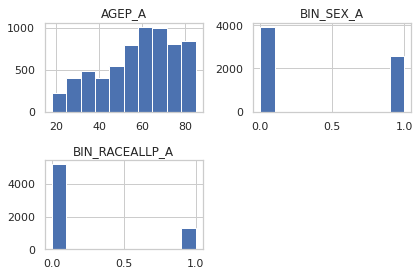

In [19]:
df_anomaly[['AGEP_A','BIN_SEX_A','BIN_RACEALLP_A']].hist()
plt.tight_layout()
